# CE802 Machine Learning and Data Mining Coursework 

## Assignment: Design and Application of a Machine
## Learning System for a Practical Problem


## 2) Comparative Study 

In [1]:
# Import libraries
!pip install mglearn

import mglearn as mglearn 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

In [35]:
## Load data 
import pandas as pd

data = pd.read_csv(r'/Users/matthewking/Documents/CE802_P2_Data.csv')
data1 = pd.read_csv(r'/Users/matthewking/Documents/CE802_P2_Data.csv')

In [36]:
# View df 
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.60,-2.92,-110.64,-5.94,15.84,20,-4.20,-104.01,-7.90,90.72,-4.99,720,6.10,12.87,NaN,True
1496,0.64,-6.48,-41.64,-21.69,8.74,2,2.74,-65.01,-10.58,70.72,-0.58,18,0.57,33.00,7.70,False
1497,12.00,-1.38,-80.64,-13.14,13.49,20,-1.48,-54.01,-9.00,240.72,-3.53,270,6.50,15.69,NaN,False
1498,18.20,-2.87,-50.64,-5.31,13.34,20,-4.18,-19.01,-8.30,380.72,-4.64,150,10.15,16.17,6.45,False


In [37]:
# view datatypes 
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12        int64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [38]:
# Convert boolean label to numeric classes 
data['Class'] = data['Class'].astype(int)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,0
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,1
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,0
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,0
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.60,-2.92,-110.64,-5.94,15.84,20,-4.20,-104.01,-7.90,90.72,-4.99,720,6.10,12.87,NaN,1
1496,0.64,-6.48,-41.64,-21.69,8.74,2,2.74,-65.01,-10.58,70.72,-0.58,18,0.57,33.00,7.70,0
1497,12.00,-1.38,-80.64,-13.14,13.49,20,-1.48,-54.01,-9.00,240.72,-3.53,270,6.50,15.69,NaN,0
1498,18.20,-2.87,-50.64,-5.31,13.34,20,-4.18,-19.01,-8.30,380.72,-4.64,150,10.15,16.17,6.45,0


In [39]:
# Check df for nans 
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [40]:
# Drop rows of df with nans 
data = data.dropna()
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,1
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,0
5,0.64,-3.71,-47.64,-18.99,8.61,2,0.94,-71.01,-10.88,50.72,-0.06,132,0.56,26.22,8.43,1
6,11.00,-0.36,-110.64,-4.08,13.19,20,-6.32,-99.01,-9.94,-9.28,-5.31,975,9.25,10.89,8.92,1
11,0.72,-4.50,-41.64,-28.98,8.90,2,1.08,-77.01,-10.06,-3.28,-0.93,21,0.23,29.52,7.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,21.10,-0.12,-50.64,-5.79,15.09,20,-2.96,10.99,-11.28,340.72,-4.29,135,6.80,12.72,6.88,0
1492,11.30,-3.36,-80.64,-3.78,15.34,20,-5.66,-89.01,-16.16,100.72,-2.65,255,6.40,11.43,8.80,1
1494,19.50,0.25,-110.64,-7.05,14.39,20,-6.24,-99.01,-11.98,320.72,-4.83,555,6.40,21.48,7.69,0
1496,0.64,-6.48,-41.64,-21.69,8.74,2,2.74,-65.01,-10.58,70.72,-0.58,18,0.57,33.00,7.70,0


In [41]:
# Check again datatypes 
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12        int64
F13      float64
F14      float64
F15      float64
Class      int64
dtype: object

In [155]:
# Set x and y 

import numpy as np

x = data.loc[:, data.columns != 'Class'].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(750, 15) (750,)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

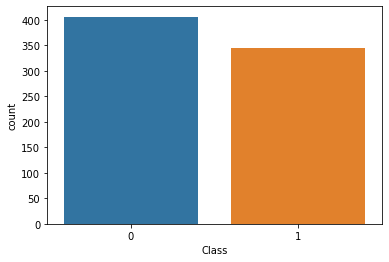

In [44]:
#Examine target varible 

import seaborn as sns

sns.countplot(x= 'Class', data = data)
plt.xticks(rotation=0)

## Start using my chosen Machine Learning algorithms 

In [ ]:
DT = DecisionTreeClassifier(criterion = "gini", random_state = 50)
score = cross_val_score(DT, x, y, cv=20) 
print(np.mean(score))

In [200]:
# sc = StandardScaler()
# clf = DT
# pipe = Pipeline(steps=[('scaler', sc), ('DecisionTreeClassifier', clf)])
# # Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(1,10)
# }
# search = GridSearchCV(pipe, param_grid, cv = 10, n_jobs=-1)
# score = cross_val_score(search, x, y) 
# print(score)

In [201]:
DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [202]:
#create pipe 
Pipeline(steps=[('scaler', StandardScaler()), ('Decision', svm.SVC())])

Pipeline(steps=[('scaler', StandardScaler()), ('Decision', SVC())])

In [203]:
#set labels for new df 
data1['Class'] = data1['Class'].astype(int)
data1

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,0
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,1
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,0
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,0
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.60,-2.92,-110.64,-5.94,15.84,20,-4.20,-104.01,-7.90,90.72,-4.99,720,6.10,12.87,NaN,1
1496,0.64,-6.48,-41.64,-21.69,8.74,2,2.74,-65.01,-10.58,70.72,-0.58,18,0.57,33.00,7.70,0
1497,12.00,-1.38,-80.64,-13.14,13.49,20,-1.48,-54.01,-9.00,240.72,-3.53,270,6.50,15.69,NaN,0
1498,18.20,-2.87,-50.64,-5.31,13.34,20,-4.18,-19.01,-8.30,380.72,-4.64,150,10.15,16.17,6.45,0


In [100]:
# set new x,y for new df with nans still present 
x1 = data1.loc[:, data1.columns != 'Class'].to_numpy()
y1 = data1.loc[:, 'Class'].to_numpy()
print(x1.shape, y1.shape)

(1500, 15) (1500,)


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 50, shuffle=True)

In [ ]:
# imputer = SimpleImputer() #set imputer 
# clf = svm.SVC(gamma='auto') # define model 
# pipe = make_pipeline(imputer, clf) #create pipe 
# param_grid ={
#     'svc__C': [0.1,1,10, 15, 20, 25],
#     'svc__kernel': ['rbf', 'linear']
# } #set parameters for grid search 

# search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
# search.fit(x1, y1); # fit 

In [141]:
imputer = SimpleImputer() #set imputer
scaler = StandardScaler()
# pca = PCA(n_components='mle')
clf = svm.SVC(gamma='auto') # define model 
pipe = Pipeline([('imp', imputer), ('scale', scaler), ('clf', clf)]) #create pipe 
param_grid ={
    'clf__C': [0.1,1,10, 15, 20, 25,50, 100, 150, 250],
    'clf__kernel': ['rbf', 'linear']
} #set parameters for grid search 

grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
grid.fit(x1, y1) # fit 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('scale', StandardScaler()),
                                       ('clf', SVC(gamma='auto'))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10, 15, 20, 25, 50, 100, 150, 250],
                         'clf__kernel': ['rbf', 'linear']})

In [136]:
# grid.cv_results_ 

In [139]:
# print(grid.cv_results_['mean_test_score'].mean())
# print(grid.cv_results_['mean_train_score'].mean())

In [140]:
grid.best_score_

0.8973333333333334

In [109]:
grid.best_params_

{'clf__C': 150, 'clf__kernel': 'rbf'}

In [42]:
# svc_accuracy = round(metrics.accuracy_score(y_test, preds) * 100, 2)
# print(" SVM model accuracy:", svc_accuracy)

In [110]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__imp', 'estimator__scale', 'estimator__clf', 'estimator__imp__add_indicator', 'estimator__imp__copy', 'estimator__imp__fill_value', 'estimator__imp__missing_values', 'estimator__imp__strategy', 'estimator__imp__verbose', 'estimator__scale__copy', 'estimator__scale__with_mean', 'estimator__scale__with_std', 'estimator__clf__C', 'estimator__clf__break_ties', 'estimator__clf__cache_size', 'estimator__clf__class_weight', 'estimator__clf__coef0', 'estimator__clf__decision_function_shape', 'estimator__clf__degree', 'estimator__clf__gamma', 'estimator__clf__kernel', 'estimator__clf__max_iter', 'estimator__clf__probability', 'estimator__clf__random_state', 'estimator__clf__shrinking', 'estimator__clf__tol', 'estimator__clf__verbose', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

## Histograms of the features

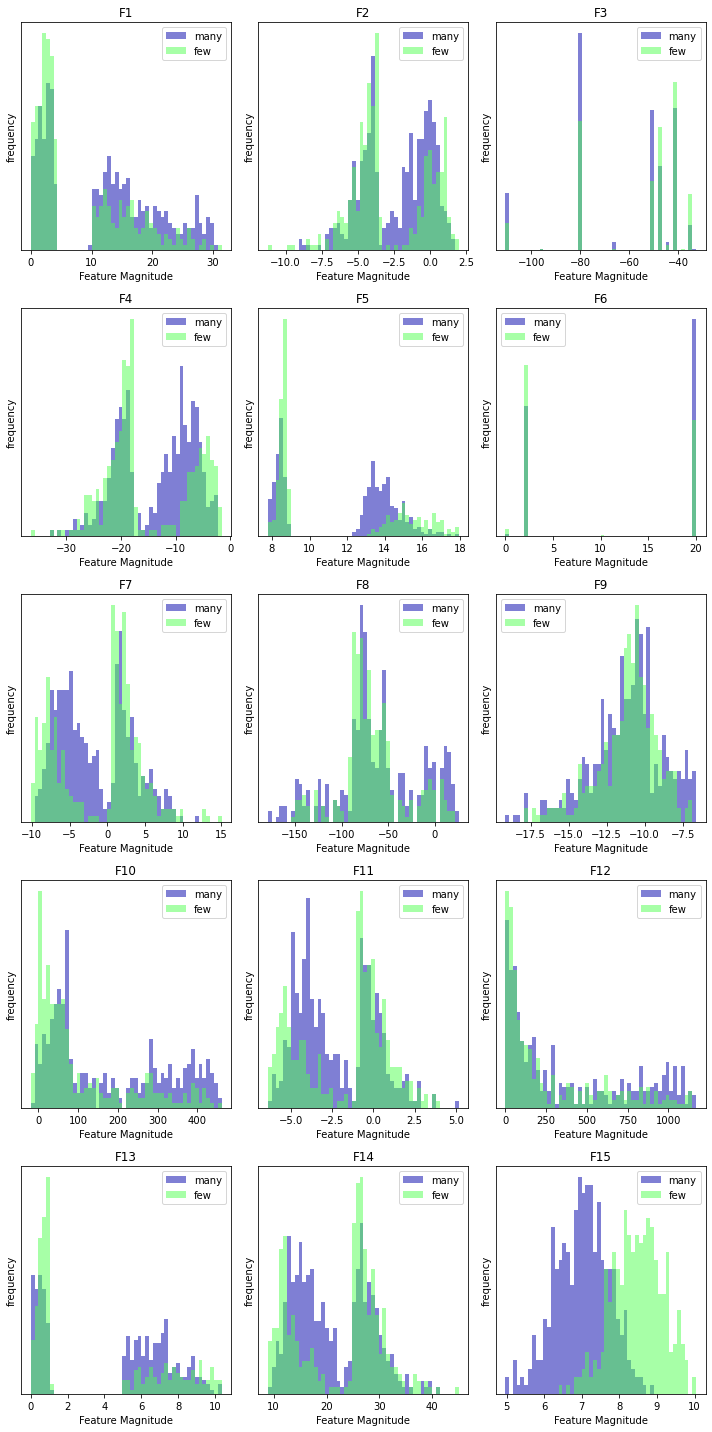

In [68]:
feature_names = data.columns[0:-1]
data_array = np.array(data)[:,0:-1]

fig, axes = plt.subplots(5,3, figsize=(10,20))
many1 = data.loc[data['Class'] == 0]
many = np.array(many1)[:,0:-1]
few1 = data.loc[data['Class'] == 1]
few = np.array(few1)[:,0:-1]

ax = axes.ravel()

for i in range(15):
    _, bins = np.histogram(data_array[:, i], bins=50)
    ax[i].hist(many[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(few[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature Magnitude")
    ax[i].set_ylabel("frequency")
    ax[i].legend(["many", "few"], loc="best")
fig.tight_layout()

## Visualising the distribution of the features can help identify which features may add significant infomation gain and may aid feature selection. 

### For example the classes in F9 are very similarly distributed and may therefore not add much efficeincy to the model. Considersation may be taken as to whether this feature should reamin in our model. 

<AxesSubplot:xlabel='F9', ylabel='F9'>

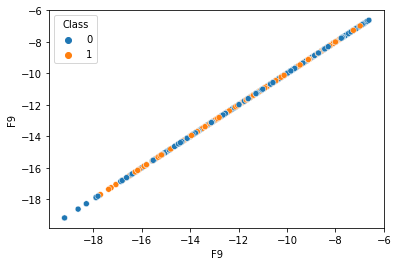

In [171]:
sns.scatterplot(data=data, x=data.F9, y=data.F9, hue="Class")

# Feature Correlation Heat Map 
## This can help identify highly correlated features with one another or the targte, this will be useful for regression

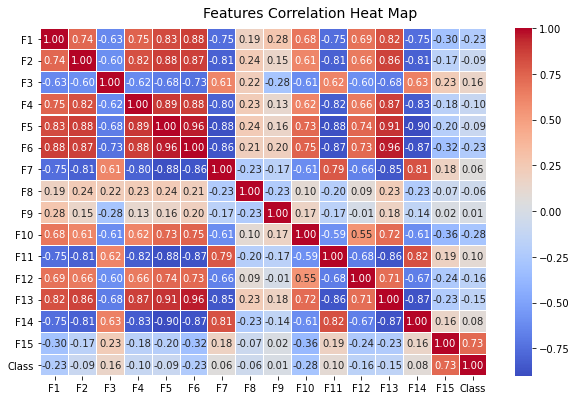

In [52]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
plt.yticks(rotation=0) 
f.subplots_adjust(top=0.93)
t = f.suptitle('Features Correlation Heat Map', fontsize=14)


<AxesSubplot:xlabel='F6', ylabel='F13'>

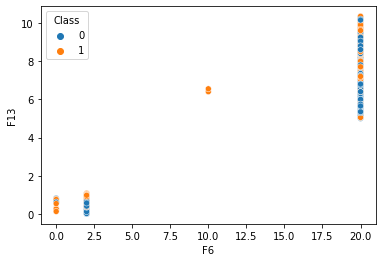

In [179]:
sns.scatterplot(data=data, x=data.F6, y=data.F13, hue="Class")

In [156]:
# Scale data and apply PCA
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
pca = PCA(n_components=2)
pca.fit(x)
x = pca.transform(x)

In [167]:
# Create new df containing principle components and target
principalDf = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['Class'])], axis=1)
finalDf

,principal component 1,principal component 2,Class
0,-3.807677,0.489975,1
1,3.310208,-2.377740,0
2,-2.621857,0.125691,1
3,3.326120,1.226105,1
4,-3.308186,0.450032,1
...,...,...,...
745,2.868923,-1.604740,0
746,1.771327,-0.840613,1
747,3.279438,1.125623,0
748,-3.367694,0.196151,0


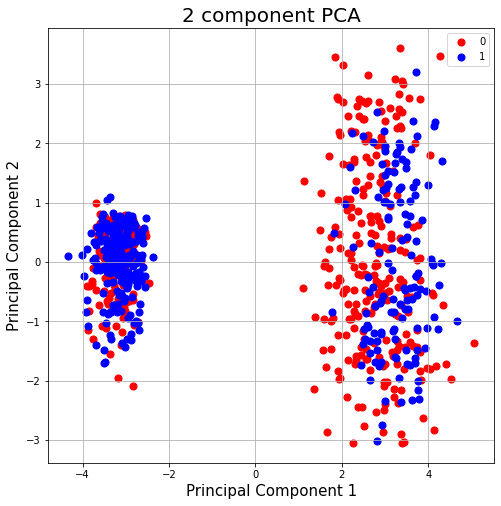

In [160]:
# plot scatter of principle components 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()